# First Project: Impact of Weather on Crime in Austin

## Setup

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from classes.weather import Weather
from classes.crime import Crime
from classes.database import Database
import data2 as data

# Choose date range to retrieve data
start_str = "2018-01-01"
end_str = "2019-12-31"

# Choose methods of getting data
crime_previously_saved = True
weather_previously_saved = True

# Choose file paths for saving/loading
crime_path = "data/crime.csv"
weather_path = "data/weather.csv"

## Retrieve Austin Crime Data (data.austintexas.gov)

In [2]:
if crime_previously_saved:
    # load from saved file
    df_crime = pd.read_csv(crime_path)
else:
    # call from API
    df_crime = data.get_crime_data(start_str, end_str)
    df_crime.to_csv(crime_path, index=False)

df_crime

,Reported Timestamp,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,2018-01-01T00:05:00.000,201810032,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,2018-01-01T00:00:00.000,RESIDENCE / HOME,78701.0,NaN,NaN,1514786400
1,2018-01-01T00:09:00.000,201810042,DWI,2100,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78748.0,NaN,NaN,1514786400
2,2018-01-01T00:10:00.000,201810047,THEFT OF SERVICE,608,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78723.0,NaN,NaN,1514786400
3,2018-01-01T00:10:00.000,201810043,DOC DISCHARGE GUN - PUB PLACE,2408,N,2018-01-01T00:00:00.000,OTHER / UNKNOWN,78721.0,NaN,NaN,1514786400
4,2018-01-01T00:13:00.000,20185000001,VIOL OF EMERG PROTECTIVE ORDER,3008,N,2017-12-31T00:00:00.000,RESIDENCE / HOME,78750.0,NaN,NaN,1514786400
...,...,...,...,...,...,...,...,...,...,...,...
210220,2019-12-31T23:37:00.000,20193652135,DWI,2100,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78727.0,NaN,NaN,1577854800
210221,2019-12-31T23:42:00.000,20193652146,DWI,2100,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701.0,NaN,NaN,1577854800
210222,2019-12-31T23:47:00.000,20193651961,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-12-31T00:00:00.000,GAS / SERVICE STATIONS,78752.0,NaN,NaN,1577854800
210223,2019-12-31T23:58:00.000,20193651731,RUNAWAY CHILD,4100,N,2019-12-31T00:00:00.000,OTHER / UNKNOWN,78704.0,NaN,NaN,1577854800


## Retrieve Weather Data (Dark Sky)

In [3]:
if weather_previously_saved:
    # load from saved file
    df_weather = pd.read_csv(weather_path)
else:
    # call from API
    df_weather = data.get_weather_data(start_str, end_str)
    df_weather.to_csv(weather_path, index=False)

df_weather

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,Temperature,UV Index,Visibility,Wind Bearing,Wind Speed,Moon Phase
0,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,26.54,0,9.997,8.0,8.08,New Moon
1,1514790000,18.43,1.00,19.40,0.75,cloudy,0.0,0.0,1038.3,Overcast,26.27,0,9.997,8.0,7.21,New Moon
2,1514793600,17.99,1.00,19.40,0.75,cloudy,0.0,0.0,1038.7,Overcast,26.27,0,9.997,2.0,7.82,New Moon
3,1514797200,18.86,1.00,15.91,0.65,cloudy,0.0,0.0,1039.0,Overcast,26.09,0,9.997,351.0,6.39,New Moon
4,1514800800,18.38,1.00,15.23,0.63,cloudy,0.0,0.0,1039.3,Overcast,26.09,0,9.997,2.0,6.99,New Moon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,1577840400,51.59,0.66,23.58,0.33,partly-cloudy-night,0.0,0.0,1021.8,Mostly Cloudy,51.59,0,10.000,126.0,0.73,New Moon
17516,1577844000,52.53,0.65,26.83,0.37,partly-cloudy-night,0.0,0.0,1021.7,Mostly Cloudy,52.53,0,10.000,134.0,0.73,New Moon
17517,1577847600,50.80,0.92,27.21,0.40,cloudy,0.0,0.0,1021.5,Overcast,50.80,0,10.000,148.0,4.24,New Moon
17518,1577851200,50.34,0.62,27.46,0.41,partly-cloudy-night,0.0,0.0,1021.4,Mostly Cloudy,50.34,0,10.000,143.0,3.17,New Moon


## Merge Data Sources (Crime and Weather Data)

In [4]:
df_result = pd.merge(df_weather, df_crime, left_on="Date", right_on="Epoch", how="right")

## Clean Data 

In [5]:
df_result

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,...,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,201810032,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,2018-01-01T00:00:00.000,RESIDENCE / HOME,78701.0,NaN,NaN,1514786400
1,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,201810042,DWI,2100,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78748.0,NaN,NaN,1514786400
2,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,201810047,THEFT OF SERVICE,608,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78723.0,NaN,NaN,1514786400
3,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,201810043,DOC DISCHARGE GUN - PUB PLACE,2408,N,2018-01-01T00:00:00.000,OTHER / UNKNOWN,78721.0,NaN,NaN,1514786400
4,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,20185000001,VIOL OF EMERG PROTECTIVE ORDER,3008,N,2017-12-31T00:00:00.000,RESIDENCE / HOME,78750.0,NaN,NaN,1514786400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210220,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,20193652135,DWI,2100,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78727.0,NaN,NaN,1577854800
210221,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,20193652146,DWI,2100,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701.0,NaN,NaN,1577854800
210222,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,20193651961,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-12-31T00:00:00.000,GAS / SERVICE STATIONS,78752.0,NaN,NaN,1577854800
210223,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,20193651731,RUNAWAY CHILD,4100,N,2019-12-31T00:00:00.000,OTHER / UNKNOWN,78704.0,NaN,NaN,1577854800


# Store in a database

In [6]:
# obj_database = Database()
# obj_database.df_save(df_result)

## Plotting Part 1 - Crime Type vs. Weather Variables

#### Crime Rate vs. Temperature

In [7]:
df_1 = df_result[["Temperature", "Crime Type", "Date"]]
# df_1

In [8]:
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 99.99, 109.99, 119.99, 9999]
temp_ranges = ["<0", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-109", "110-119", ">120"]
df_1["Temperature Group"] = pd.cut(df_1["Temperature"], bins, labels = temp_ranges)
# df_1

C:\Users\eanor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df_group = df_1.groupby(["Crime Type", "Temperature Group"])["Date"]
crime_counts = df_group.count()
hour_counts = df_group.nunique()
crime_rates = crime_counts / hour_counts
top5 = crime_rates.sort_values(ascending=False).head(5)
df_crime_rates = top5.to_frame()
df_crime_rates = df_crime_rates.reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates

,Crime Type,Temperature Group,Crime Rate
0,BURGLARY OF VEHICLE,80-89,2.545126
1,BURGLARY OF VEHICLE,30-39,2.437710
2,BURGLARY OF VEHICLE,40-49,2.404040
3,BURGLARY OF VEHICLE,50-59,2.336207
4,BURGLARY OF VEHICLE,70-79,2.224977


In [10]:
legend = df_crime_rates["Crime Type"].drop_duplicates()
legend

0    BURGLARY OF VEHICLE
Name: Crime Type, dtype: object

In [11]:
# Pivoting results dataframe
df_pivot = pd.pivot_table(df_crime_rates, values=["Crime Rate"], index =["Temperature Group"],
                   columns=["Crime Type"])

df_pivot

,Crime Rate
Crime Type,BURGLARY OF VEHICLE
Temperature Group,
30-39,2.437710
40-49,2.404040
50-59,2.336207
70-79,2.224977
80-89,2.545126


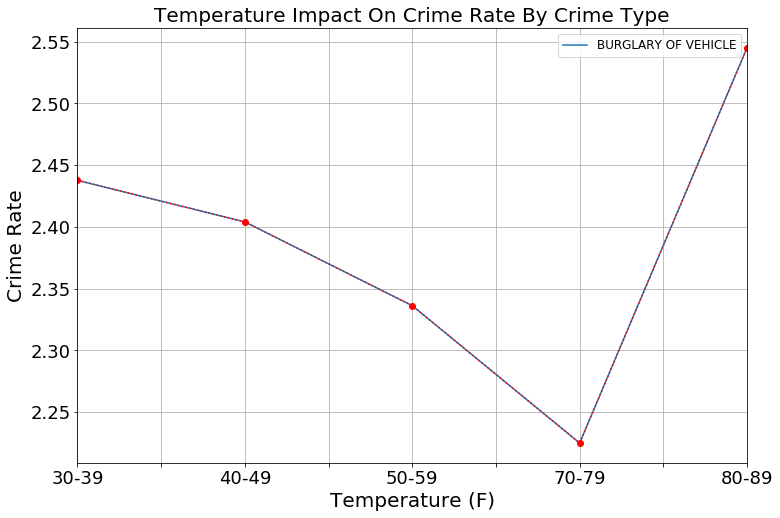

In [12]:
ax = df_pivot.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot.plot(figsize=(12,8), style=["ro:", "b^:", "gs:"], markersize=6, ax = ax, grid=True)
plt.title("Temperature Impact On Crime Rate By Crime Type", fontsize=20)
plt.legend(legend, fontsize=12)
plt.xlabel("Temperature (F)", fontsize=20)
plt.ylabel("Crime Rate", fontsize=20)
plt.tick_params(labelsize=18)

#### Crime Type vs. Atmospheric Pressure

#### Crime Type vs. Humidity

#### Crime Type vs. Moon Phase

In [13]:
df_1 = df_result[["Moon Phase", "Crime Type", "Date"]]
df_1

,Moon Phase,Crime Type,Date
0,New Moon,ASSAULT W/INJURY-FAM/DATE VIOL,1514786400
1,New Moon,DWI,1514786400
2,New Moon,THEFT OF SERVICE,1514786400
3,New Moon,DOC DISCHARGE GUN - PUB PLACE,1514786400
4,New Moon,VIOL OF EMERG PROTECTIVE ORDER,1514786400
...,...,...,...
210220,NaN,DWI,1577854800
210221,NaN,DWI,1577854800
210222,NaN,CRASH/FAIL STOP AND RENDER AID,1577854800
210223,NaN,RUNAWAY CHILD,1577854800


In [14]:
df_group = df_1.groupby(["Crime Type", "Moon Phase"])["Date"]
crime_counts = df_group.count()
hour_counts = df_group.nunique()
crime_rates = crime_counts / hour_counts
top5 = crime_rates.sort_values(ascending=False).head(5)
df_crime_rates = top5.to_frame()
df_crime_rates = df_crime_rates.reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates

,Crime Type,Moon Phase,Crime Rate
0,BURGLARY OF VEHICLE,New Moon,2.346405
1,THEFT,New Moon,1.970772
2,FAMILY DISTURBANCE,New Moon,1.822925
3,CRIMINAL MISCHIEF,New Moon,1.445517
4,THEFT BY SHOPLIFTING,New Moon,1.377591


In [15]:
legend = df_crime_rates["Crime Type"]
df_pivot = pd.pivot_table(df_crime_rates, values=["Crime Rate"], index =["Moon Phase"],
                   columns=["Crime Type"])

df_pivot

Crime Rate                                                 \
Crime Type BURGLARY OF VEHICLE CRIMINAL MISCHIEF FAMILY DISTURBANCE     THEFT   
Moon Phase                                                                      
New Moon              2.346405          1.445517           1.822925  1.970772   

                                 
Crime Type THEFT BY SHOPLIFTING  
Moon Phase                       
New Moon               1.377591

C:\Users\eanor\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


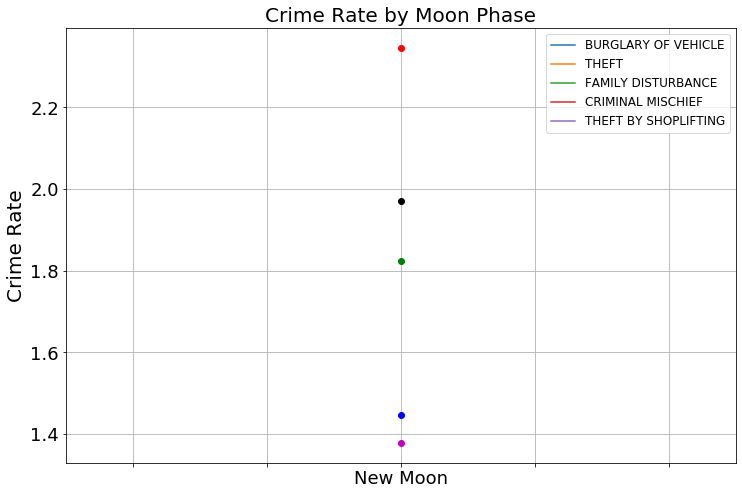

In [16]:
ax = df_pivot.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot.plot(figsize=(12,8), style=["ro", "bo", "go", "ko", "mo"], markersize=6, ax = ax, grid=True)
plt.title("Crime Rate by Moon Phase", fontsize=20)
plt.legend(legend, fontsize=12)
plt.xlabel("")
plt.ylabel("Crime Rate", fontsize=20)
plt.tick_params(labelsize=18)

## Plotting Part 2 - Crime Location Type vs. Weather Variables 

#### Crime Location Type vs. Temperature

#### Crime Location Type vs. Atmospheric Pressure

#### Crime Location Type vs. Humidity

#### Crime Location Type vs. Moon Phase 

## Written Analysis and Conclusions